In [1]:
%matplotlib inline
from scipy.stats import multinomial, dirichlet, norm
import numpy as np

np.random.seed(37)
n = 2000
half = n / 2

In [2]:
def print_mat(m):
    rows = m.shape[0]
    cols = m.shape[1]
    for r in range(rows):
       print(','.join(['{:.2f}'.format(m[r, c]) for c in range(cols)]))
    print('{}x{}'.format(rows, cols))
    
def print_vec(v):
    print(','.join(['{:.2f}'.format(c) for c in v])) 
    print('1x{}'.format(len(v)))

$y = 5 + 3a + 0.8g_1 -2h_1 + 3h_2 + \epsilon$

In [3]:
intercept = np.ones(n).reshape(n, 1)
age = norm.rvs(25, 1, size=n).reshape(n, 1)
gender = multinomial.rvs(1, [0.2, 0.8], size=n)
height = multinomial.rvs(1, [0.2, 0.6, 0.2], size=n)
noise = norm.rvs(0, 1, size=1)

X = np.hstack([intercept, age, gender, height])
X_train = X[0:half, :]
X_test = X[half:n, :]

Z = np.delete(X, [2, 4], axis=1)
Z_train = Z[0:half, :]
Z_test = Z[half:n, :]

w = np.array([5.0, 3.0, 0.0, 0.8, 0.0, -2.0, 3.0], dtype=np.float).reshape(X.shape[1], 1)

y = np.dot(X, w) + noise
y_train = y[0:half]
y_test = y[half:n]

In [4]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score

lr = LinearRegression(fit_intercept=False)
la = Lasso(fit_intercept=False)
ri = Ridge(fit_intercept=False)

lr.fit(X_train, y_train)
la.fit(X_train, y_train)
ri.fit(X_train, y_train)

print_mat(lr.coef_)
print_vec(la.coef_)
print_mat(ri.coef_)

print('{:.5f} ols R^2'.format(r2_score(y_test, lr.predict(X_test))))
print('{:.5f} lasso R^2'.format(r2_score(y_test, la.predict(X_test))))
print('{:.5f} ridge R^2'.format(r2_score(y_test, ri.predict(X_test))))

2.10,3.00,0.65,1.45,0.37,-1.63,3.37
1x7
0.00,3.12,-0.00,0.00,0.00,-0.00,0.00
1x7
1.58,3.04,0.39,1.19,0.20,-1.80,3.18
1x7
1.00000 ols R^2
0.68525 lasso R^2
0.99988 ridge R^2


In [5]:
lr = LinearRegression(fit_intercept=False)
la = Lasso(fit_intercept=False)
ri = Ridge(fit_intercept=False)

lr.fit(Z_train, y_train)
la.fit(Z_train, y_train)
ri.fit(Z_train, y_train)

print_mat(lr.coef_)
print_vec(la.coef_)
print_mat(ri.coef_)

print('{:.5f} ols R^2'.format(r2_score(y_test, lr.predict(Z_test))))
print('{:.5f} lasso R^2'.format(r2_score(y_test, la.predict(Z_test))))
print('{:.5f} ridge R^2'.format(r2_score(y_test, ri.predict(Z_test))))

3.12,3.00,0.80,-2.00,3.00
1x5
0.00,3.12,0.00,-0.00,0.00
1x5
1.93,3.05,0.80,-1.99,2.99
1x5
1.00000 ols R^2
0.68525 lasso R^2
0.99982 ridge R^2


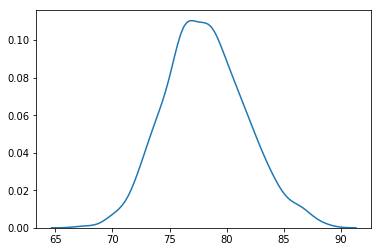

In [6]:
import seaborn as sns

sns.kdeplot(y.transpose()[0])

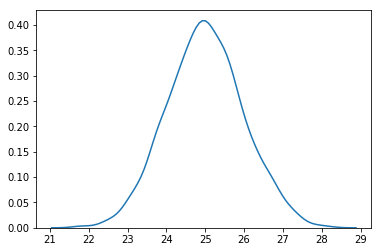

In [7]:
sns.kdeplot(age.transpose()[0])